<a href="https://colab.research.google.com/github/ddovidovich/DataScienceLerning/blob/main/UNIT_02_DZ_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


#Шаблон ноутбука

In [1]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential      

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 

# Утилиты для to_categorical()
from tensorflow.keras import utils    

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam  

# Библиотека для работы с массивами
import numpy as np    

# Отрисовка графиков
import matplotlib.pyplot as plt    

# Разделение данных на выборки
from sklearn.model_selection import train_test_split 

# Для загрузки датасета
from sklearn.datasets import load_wine                     

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

##Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [2]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


##Подготовка данных

In [3]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data, 
                                                y_data, 
                                                test_size=0.1, 
                                                shuffle=True, 
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную 
x_train, x_val, y_train, y_val = train_test_split(x_all, 
                                                  y_all, 
                                                  test_size=0.1, 
                                                  shuffle=True, 
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)
print()
print(x_test.shape)
print(y_test.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)

(18, 13)
(18, 3)


In [114]:
# Создание последовательной модели
model = Sequential()
model.add(BatchNormalization(input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Обучение сети
history = model.fit(x_train, 
                    y_train, 
                    batch_size=16, 
                    epochs=200,
                    validation_data=(x_val, y_val), 
                    verbose=1)

Epoch 1/200
9/9 [==============================] - 1s 23ms/step - loss: 0.6568 - accuracy: 0.5625 - val_loss: 0.9557 - val_accuracy: 0.2500
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 0.3966 - accuracy: 0.8403 - val_loss: 0.7340 - val_accuracy: 0.2500
Epoch 3/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2683 - accuracy: 0.9444 - val_loss: 0.6863 - val_accuracy: 0.2500
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 0.2069 - accuracy: 0.9653 - val_loss: 0.7035 - val_accuracy: 0.2500
Epoch 5/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1786 - accuracy: 0.9583 - val_loss: 0.7085 - val_accuracy: 0.2500
Epoch 6/200
9/9 [==============================] - 0s 5ms/step - loss: 0.2004 - accuracy: 0.9306 - val_loss: 0.7049 - val_accuracy: 0.2500
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 0.1431 - accuracy: 0.9861 - val_loss: 0.6835 - val_accuracy: 0.2500
Epoch 8/200
9/9 [=========

In [115]:
# Краткая сводка архитектуры модели
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_43 (Bat  (None, 13)               52        
 chNormalization)                                                
                                                                 
 dense_131 (Dense)           (None, 128)               1792      
                                                                 
 dense_132 (Dense)           (None, 64)                8256      
                                                                 
 dense_133 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_44 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_134 (Dense)           (None, 3)               

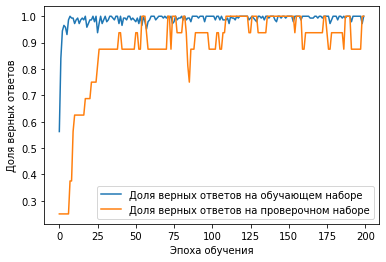

In [116]:
# Отрисовка графика точности на обучающей выборке
# label - имя графика в легенде
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Отрисовка графика точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенду
plt.legend()

# Вывод графика
plt.show()

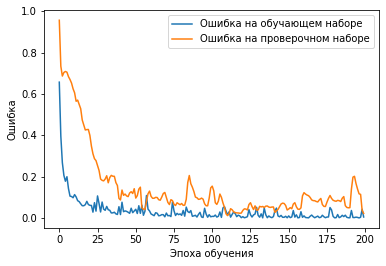

In [117]:
# Вывод графика ошибки
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [118]:
# Вычисление результата (предсказания) сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)

print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

1/1 [==============================] - 0s 129ms/step - loss: 0.0036 - accuracy: 1.0000
[0.003580166259780526, 1.0]
Доля верных ответов на тестовых данных, в процентах: 100.0000%
